# Diabets prediction with fast.ai

This is a simple way to work with medical tabular data in fast.ai

In [54]:
from fastai.tabular.all import *
import pandas as pd

In [55]:
import torch
torch.cuda.is_available()

False

In [56]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
diabetes_data_copy = diabetes_data.copy(deep=True)
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[[
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Then fill the NaN data

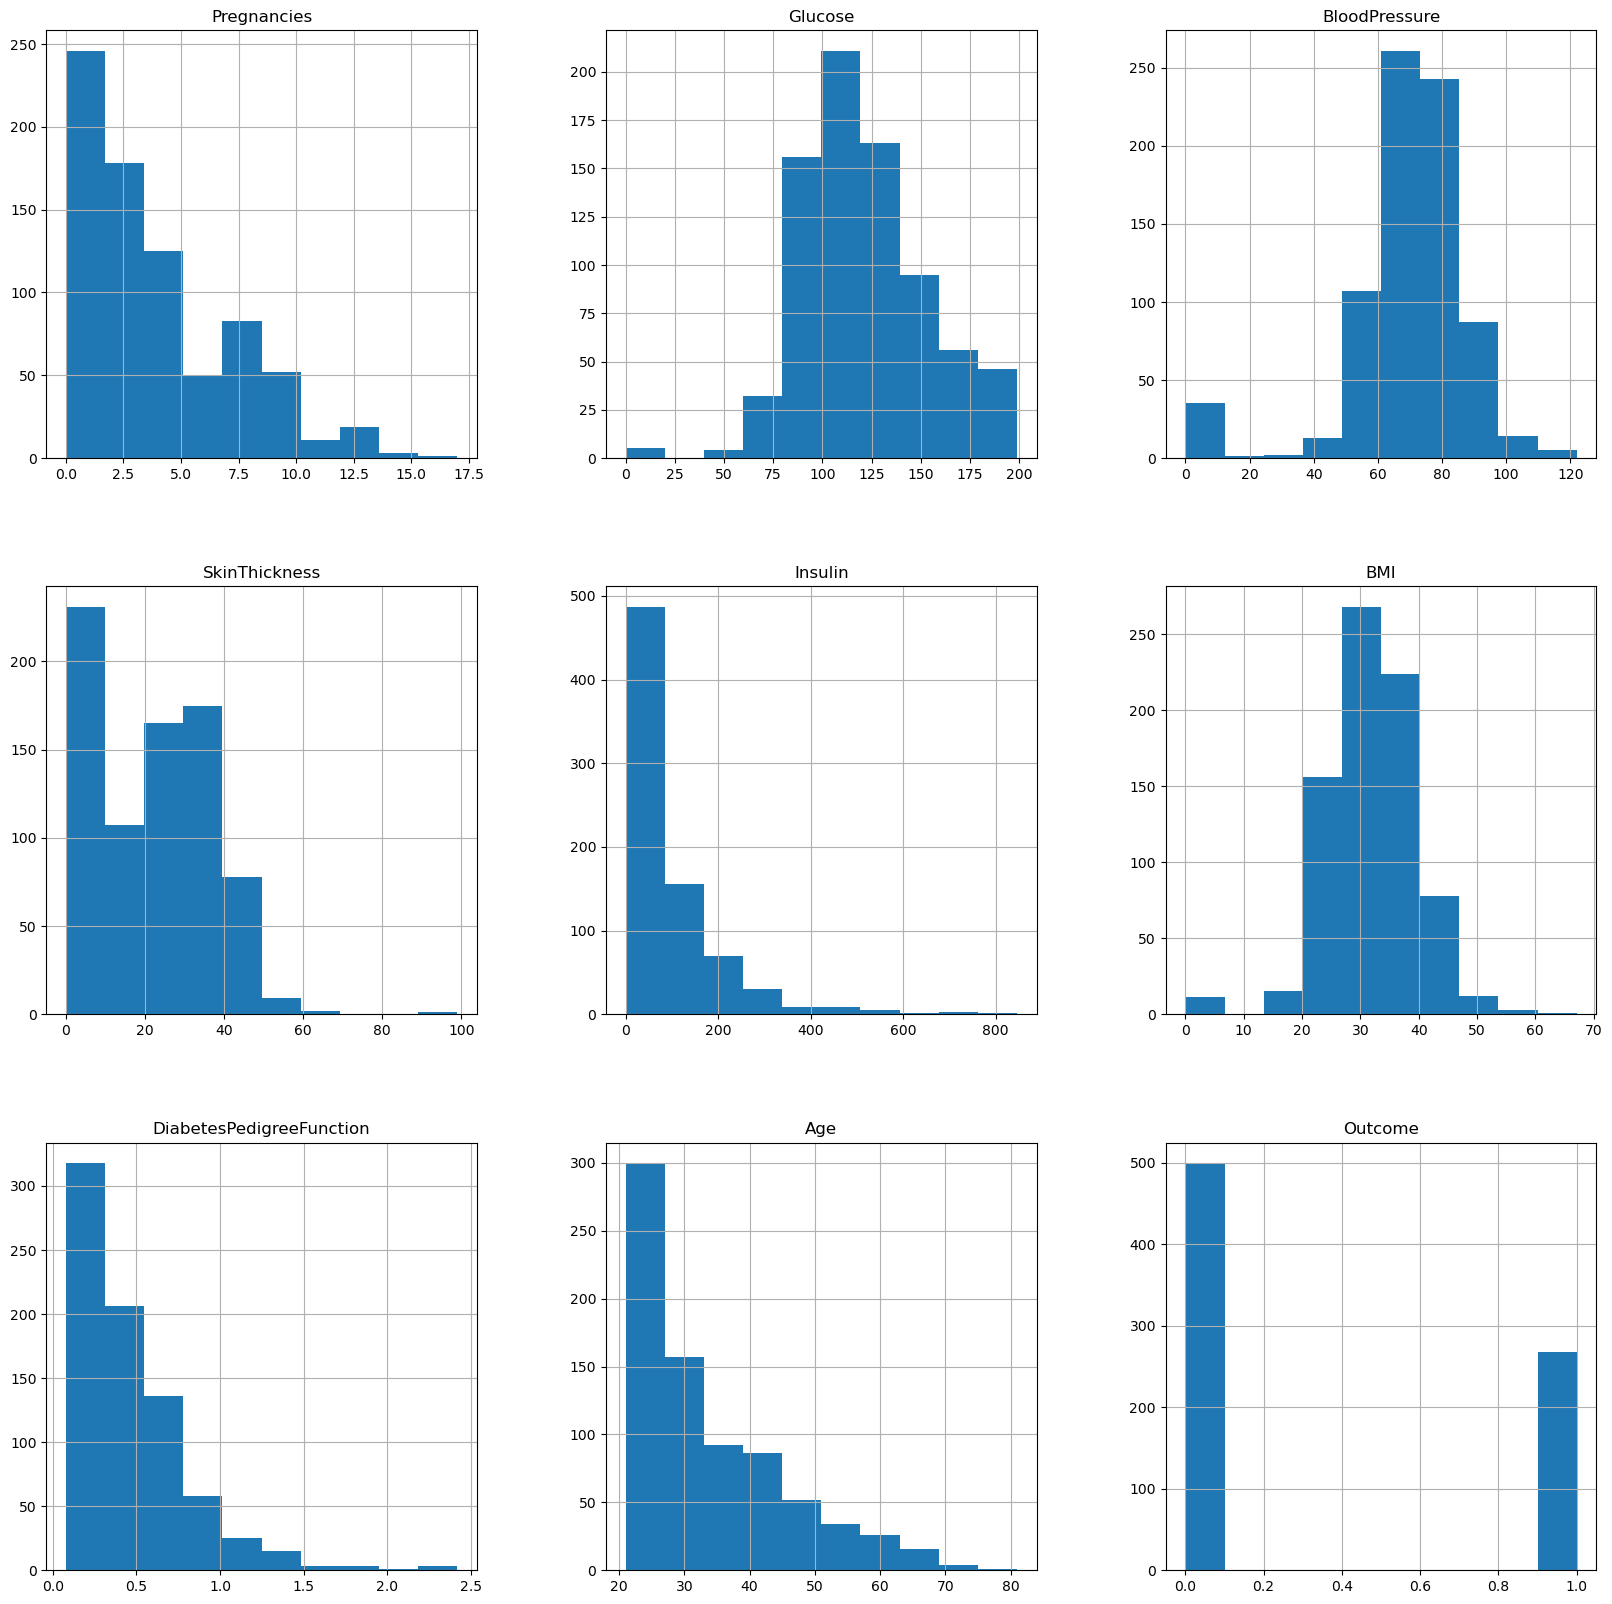

In [58]:
p = diabetes_data.hist(figsize=(20, 20))

In [59]:
diabetes_data_copy['Glucose'].fillna(
    diabetes_data_copy['Glucose'].mean(), inplace=True)
diabetes_data_copy['BloodPressure'].fillna(
    diabetes_data_copy['BloodPressure'].mean(), inplace=True)
diabetes_data_copy['SkinThickness'].fillna(
    diabetes_data_copy['SkinThickness'].median(), inplace=True)
diabetes_data_copy['Insulin'].fillna(
    diabetes_data_copy['Insulin'].median(), inplace=True)
diabetes_data_copy['BMI'].fillna(
    diabetes_data_copy['BMI'].median(), inplace=True)

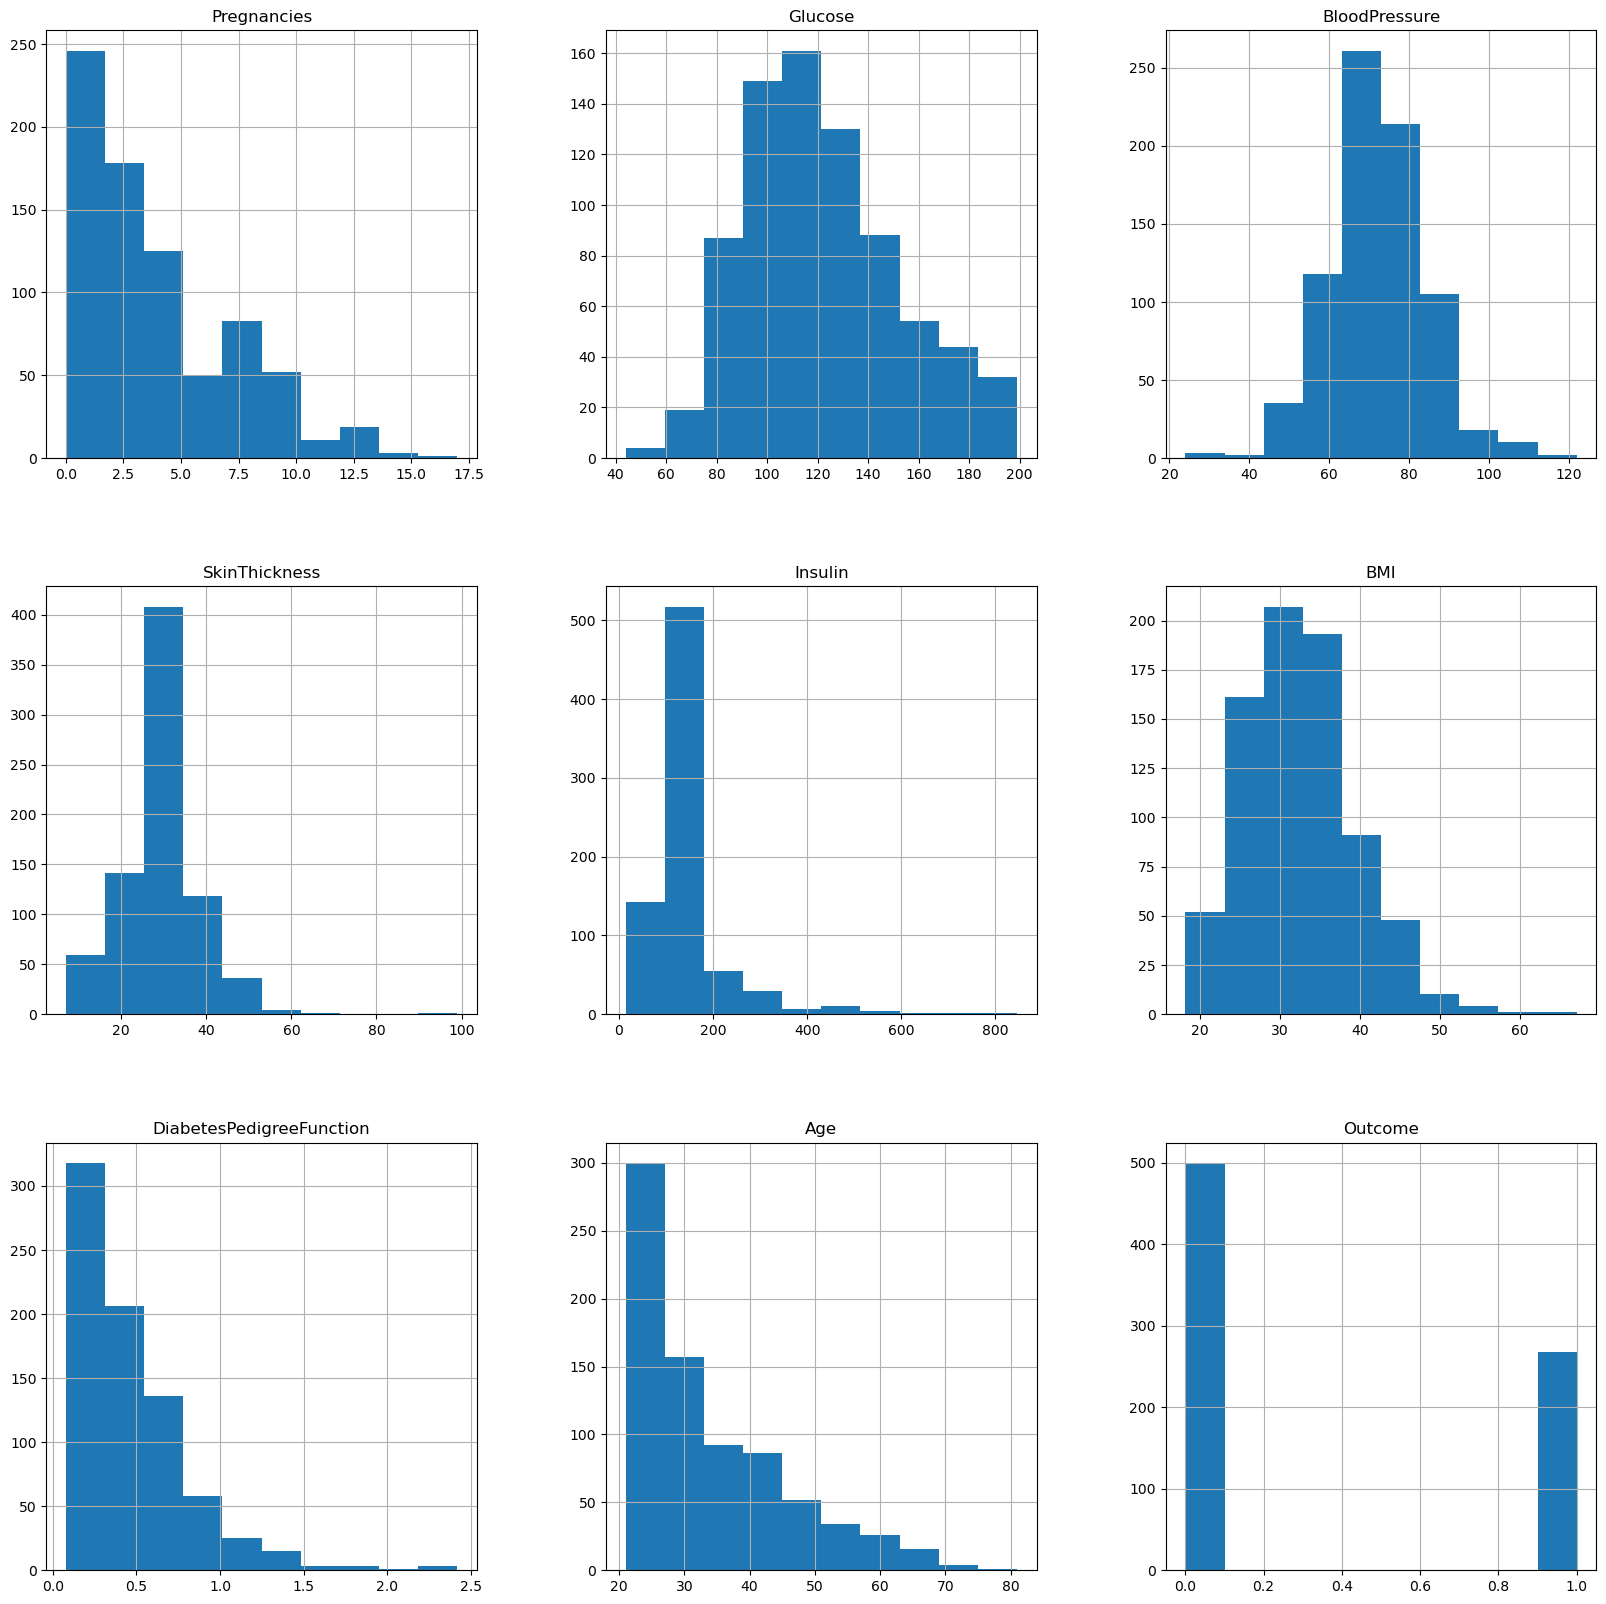

In [60]:
p = diabetes_data_copy.hist(figsize=(20, 20))

In [61]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Use StandartScaler for get simular to other values in data

In [62]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
y = diabetes_data_copy.Outcome
original_outcome_column = diabetes_data_copy["Outcome"].copy()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"], axis=1),),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', "Age", 'DiabetesPedigreeFunction'])

X["Outcome"] = original_outcome_column
X.to_csv('X_diabets.csv', index=False)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Outcome
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,1


In [63]:
dls = TabularDataLoaders.from_df(X, path='X_diabets.csv', y_names="Outcome",
                                 cont_names=['BMI', 'Age', 'Pregnancies', 'Glucose', 'BloodPressure',
                                             'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'],
                                 procs=[Categorify, FillMissing,
                                        Normalize], bs=32,
                                 device=torch.device('cpu'))

In [64]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(10)

C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.424722,0.293478,0.647059,00:00
1,0.347306,0.239131,0.647059,00:00
2,0.293538,0.225889,0.647059,00:00
3,0.255918,0.195809,0.647059,00:00
4,0.223296,0.208240,0.647059,00:00
5,0.201451,0.179067,0.647059,00:00
6,0.182839,0.196856,0.647059,00:00
7,0.167455,0.193202,0.647059,00:00
8,0.150961,0.186585,0.647059,00:00
9,0.142037,0.186449,0.647059,00:00


C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
C:\Users\idirt\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps